In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [22]:
tfms =[[rotate(degrees=(0,90), p=1.0)], [crop_pad()]]


In [23]:
np.random.seed(42)


In [24]:
# from pathlib import Path
# path = Path("train-snakes-cropped/")

# print(path)
# for c in data.classes:
#     print(c)
#     verify_images(path/c, delete=True)

In [25]:
src = (ImageList.from_folder(path='train-snakes-cropped').split_by_rand_pct(0.2).label_from_folder())

In [26]:
src

LabelLists;

Train: LabelList (65932 items)
x: ImageList
Image (3, 231, 201),Image (3, 180, 204),Image (3, 407, 259),Image (3, 290, 280),Image (3, 243, 248)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train-snakes-cropped;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 205, 183),Image (3, 230, 144),Image (3, 1052, 936),Image (3, 176, 230),Image (3, 217, 314)
y: CategoryList
class-448,class-966,class-204,class-540,class-854
Path: train-snakes-cropped;

Test: None

In [27]:
data = src.transform(tfms,size=256).databunch(bs=16).normalize(imagenet_stats)

In [28]:
data.c

45

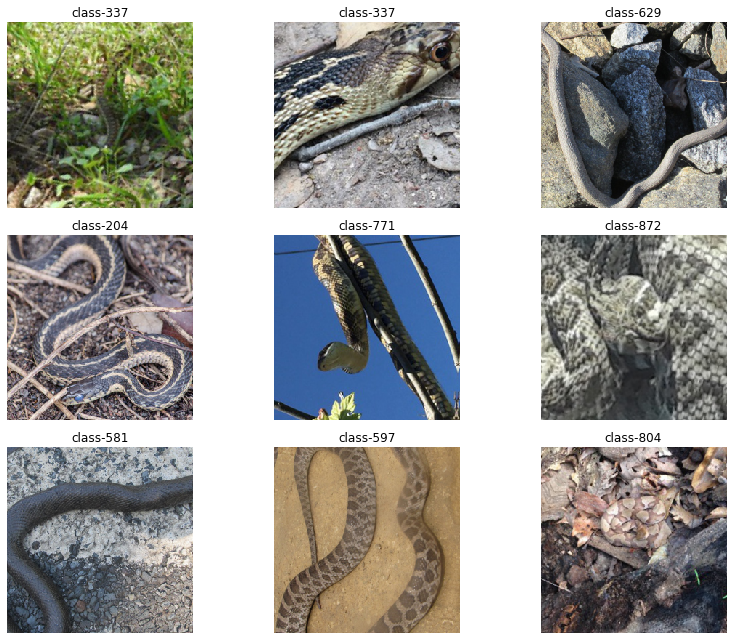

In [29]:
data.show_batch(rows=3, figsize=(12,9))

In [30]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')])


In [31]:
learn = learn.to_fp16(dynamic=True)


In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


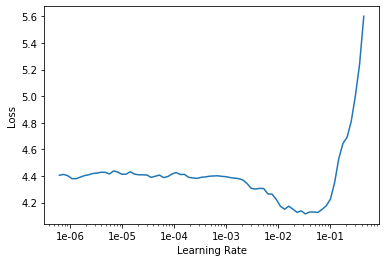

In [33]:
learn.recorder.plot()

In [34]:
lr=1e-2

In [ ]:
learn.fit_one_cycle(2,1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,2.276865,6.392758,0.574228,0.425772,0.285549,53:05


In [ ]:
data = src.transform(tfms,size=512).databunch(bs=4).normalize(imagenet_stats)

In [ ]:
learn.data = data

In [ ]:
learn

In [ ]:
learn.fit_one_cycle(2,slice(1e-6,lr/10))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


In [ ]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)


In [ ]:
interp.most_confused(min_val=2)
